# Quantum Tunneling in a Gauge field

The ground state wavefunction of a BEC in a rotating harmonic trap contains a regular Abrikosov lattice of nodes corresponding to single quantum vortices. 

In [1]:
import sys, os
sys.path.append(os.path.abspath('..'))

import numpy as np
from condensate import Wavefunction, Environment, hbar
import matplotlib.pyplot as plt
%matplotlib inline

## Setup a double well

In [3]:
DIM = 512
fov = 0.56e-3

def doubleWell(sigma, separation, amp=500, single=False):
    V = np.zeros((DIM,DIM))
    for i in range(DIM):
        for j in range(DIM):
            x = (i-DIM//2)*fov / DIM
            y = (j-DIM//2)*fov / DIM
            spot1 = (1-np.exp(-(x**2+ (y-separation/2)**2)/sigma**2))
            spot2 = (not single) * (1-np.exp(-(x**2+ (y+separation/2)**2)/sigma**2))
            V[i,j] = amp*((spot1+spot2)-1)
    return V


def initialize_Psi(separation, width=50):
    Psi = (1+0.j)*np.zeros((DIM,DIM))
    x = (1+0.j)*np.zeros((DIM,DIM))
    for i in range(DIM):
        for j in range(DIM):
            phase = 1
            Psi[i,j] = np.exp(-( (i-DIM//2)/width)** 2.  -  ( ((j-separation-DIM//2)/width)** 2. )) + 1.j
            Psi[i,j] *= phase
    return Psi



            Running condensate on 512x512 grid with:
            atom number: 1e+01 
            mass:        3.80e-26
        


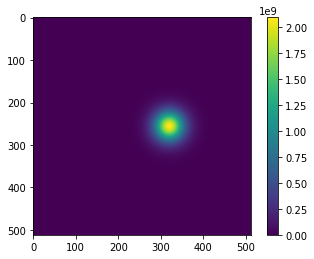

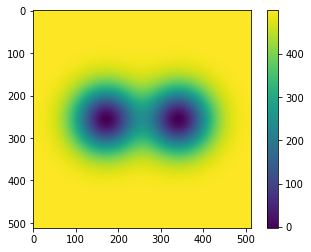

In [74]:
wellseparation = fov/4
wellwidth = fov/2
N=10
# N=2e5

V = doubleWell(sigma=wellwidth, separation=wellseparation, amp=500, single=True)
e = Environment(DIM=DIM, fov=fov, N=N)
e.custom_potential(V)
e.spoon['type']='mouse'

wf = Wavefunction(e)
psi0x0 = DIM * wellseparation / (2* fov)
wf.Psi = initialize_Psi(separation=psi0x0)
wf.relax(dt=2e-4, steps=200, vmax=1e8)
wf.relax(dt=2e-4, steps=200, vmax=1e8)
wf.show_density()
V = doubleWell(sigma=fov/7, separation=fov/3, amp=500, single=False)
plt.imshow(V)
plt.colorbar()
e.custom_potential(V)

In [73]:

wf.evolve(dt=1e-4, steps=0,cooling=0.00)